In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [28]:
# Load and preprocess the dataset
train_path = '/Users/bhanutevathia/Documents/archive/mnist_train.csv'
test_path = '/Users/bhanutevathia/Documents/archive/mnist_test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

X_train, y_train = train_data.iloc[:, 1:], train_data.iloc[:, 0]
X_test, y_test = test_data.iloc[:, 1:], test_data.iloc[:, 0]

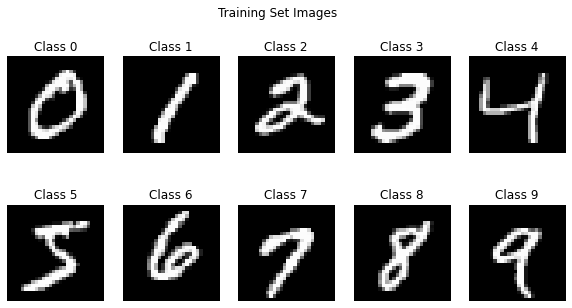

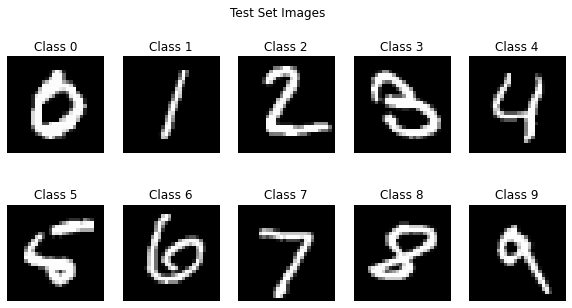

In [30]:
# Visualize two images of each class in a single grid
def plot_images(X, y, title):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        img = X[y == i].iloc[0].values.reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Class {i}")
        ax.axis('off')
    plt.suptitle(title)
    plt.show()
    
plot_images(X_train, y_train, "Training Set Images")
plot_images(X_test, y_test, "Test Set Images")

In [31]:
# Binary Logistic Regression for OVO
ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter=100)).fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [32]:
# Binary Logistic Regression for OVR
ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=100)).fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [33]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [34]:
# Percentage of variance covered by the first two principal components
variance_percentage = sum(pca.explained_variance_ratio_) * 100
print(f"Percentage of Variance Covered by First Two Principal Components: {variance_percentage:.2f}%")

Percentage of Variance Covered by First Two Principal Components: 16.80%


In [35]:
# Evaluate the performance on the test set
def evaluate_performance(clf, X_test, y_test, title):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"\n{title} Classification Report:\n")
    print(f"Accuracy: {accuracy:.4f}\n")
    print(classification_rep)

In [36]:
# Evaluate OVO classifier
evaluate_performance(ovo_clf, X_test, y_test, "OVO")


OVO Classification Report:

Accuracy: 0.9276

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.93      0.96      0.94       982
           5       0.89      0.87      0.88       892
           6       0.95      0.94      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [37]:
# Evaluate OVR classifier
evaluate_performance(ovr_clf, X_test, y_test, "OVR")


OVR Classification Report:

Accuracy: 0.9178

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.85      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.83      0.88      0.86       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

